In [12]:
import pandas as pd

df = pd.read_csv(r"C:\Users\karut\OneDrive\Desktop\Kaggle Dataset\credit_card_fraud_10k.csv")
df.head()


,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0


In [13]:
df.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


In [7]:
!pip install imbalanced-learn


In [19]:
from imblearn.over_sampling import SMOTE


In [39]:
!pip install xgboost


   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   - -------------------------------------- 1.8/72.0 MB 20.2 MB/s eta 0:00:04
   ---- ----------------------------------- 8.7/72.0 MB 29.9 MB/s eta 0:00:03
   -------- ------------------------------- 14.9/72.0 MB 30.3 MB/s eta 0:00:02
   ------------ --------------------------- 22.0/72.0 MB 31.7 MB/s eta 0:00:02
   ---------------- ----------------------- 29.1/72.0 MB 31.8 MB/s eta 0:00:02
   ------------------- -------------------- 35.1/72.0 MB 31.4 MB/s eta 0:00:02
   ----------------------- ---------------- 41.4/72.0 MB 31.7 MB/s eta 0:00:01
   -------------------------- ------------- 48.0/72.0 MB 31.5 MB/s eta 0:00:01
   ------------------------------ --------- 54.3/72.0 MB 31.4 MB/s eta 0:00:01
   ---------------------------------- ----- 61.3/72.0 MB 31.5 MB/s eta 0:00:01
   ------------------------------------- -- 67.1/72.0 MB 31.2 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 31.2 M

In [14]:
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier


from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [10]:
df.isnull().sum()

transaction_id         0
amount                 0
transaction_hour       0
merchant_category      0
foreign_transaction    0
location_mismatch      0
device_trust_score     0
velocity_last_24h      0
cardholder_age         0
is_fraud               0
dtype: int64

In [11]:
df.drop_duplicates()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0
...,...,...,...,...,...,...,...,...,...,...
9995,9996,350.91,22,Food,0,0,99,4,37,0
9996,9997,410.04,5,Clothing,0,0,70,3,25,0
9997,9998,527.75,21,Electronics,0,0,44,2,45,0
9998,9999,91.20,2,Electronics,0,0,38,0,37,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


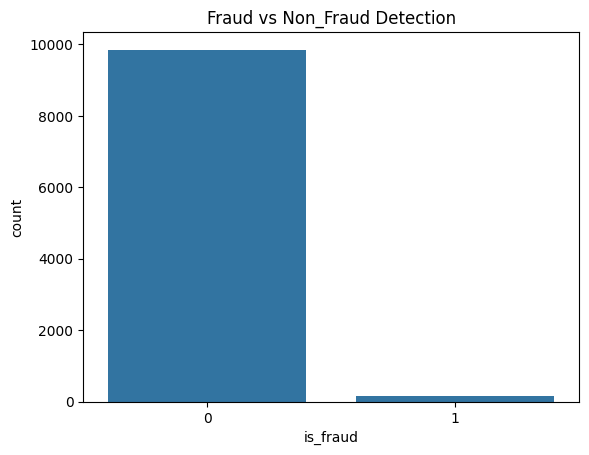

In [13]:
plt.figure()
sns.countplot(x="is_fraud", data=df)
plt.title("Fraud vs Non_Fraud Detection")
plt.show()

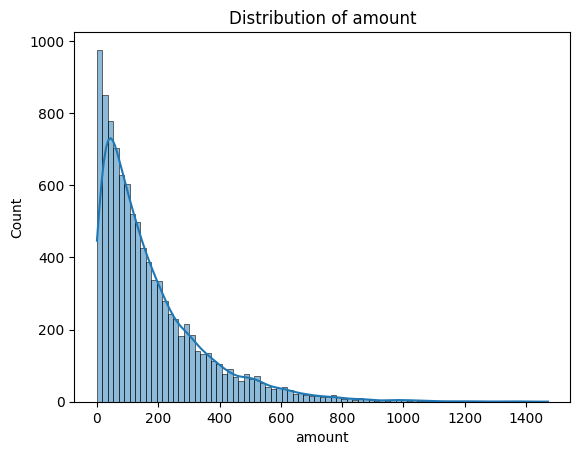

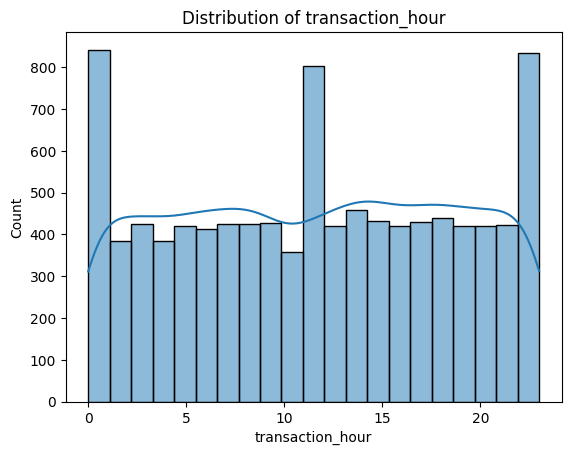

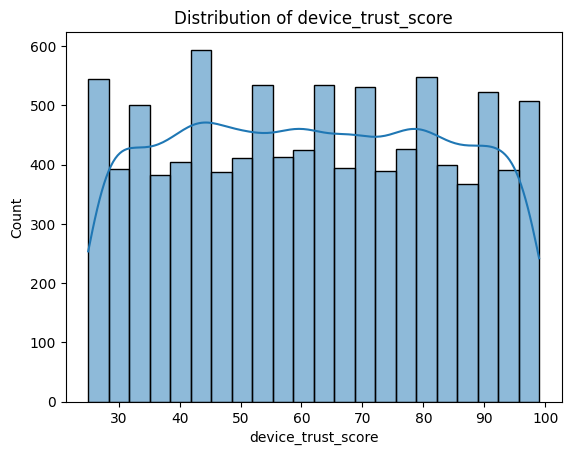

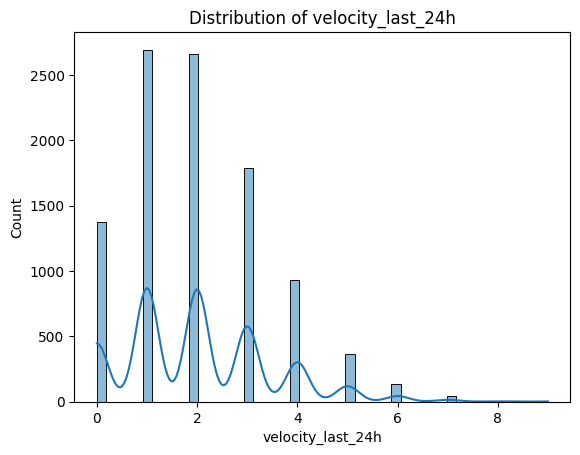

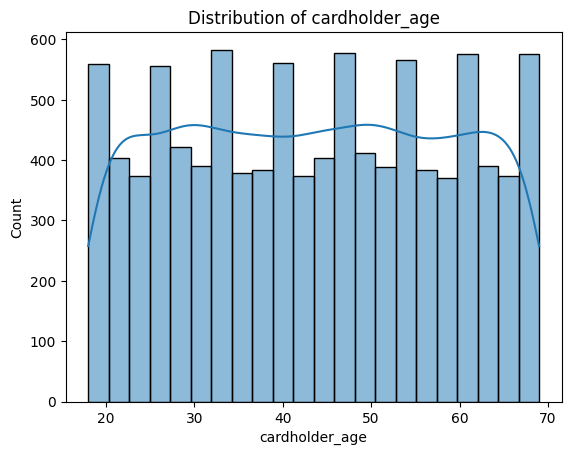

In [16]:
columns = ["amount", "transaction_hour", "device_trust_score", "velocity_last_24h", "cardholder_age"]
for col in columns:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

In [15]:
df["night_transaction"]= df["transaction_hour"].isin([0,1,2,3]).astype(int)

df["high_amount"] = (df["amount"] > 900).astype(int)

In [18]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,night_transaction,high_amount
0,1,84.47,22,Electronics,0,0,66,3,40,0,0,0
1,2,541.82,3,Travel,1,0,87,1,64,0,1,0
2,3,237.01,17,Grocery,0,0,49,1,61,0,0,0
3,4,164.33,4,Grocery,0,1,72,3,34,0,0,0
4,5,30.53,15,Food,0,0,79,0,44,0,0,0


In [16]:
le = LabelEncoder()
df["merchant_category"] = le.fit_transform(df["merchant_category"])

In [17]:
df.head()

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,night_transaction,high_amount
0,1,84.47,22,1,0,0,66,3,40,0,0,0
1,2,541.82,3,4,1,0,87,1,64,0,1,0
2,3,237.01,17,3,0,0,49,1,61,0,0,0
3,4,164.33,4,3,0,1,72,3,34,0,0,0
4,5,30.53,15,2,0,0,79,0,44,0,0,0


In [20]:
X=df.drop("is_fraud", axis=1)
y=df["is_fraud"]

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
y_resampled.value_counts()

is_fraud
0    9849
1    9849
Name: count, dtype: int64

In [21]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_resampled)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_resampled, test_size=0.2, random_state=42)

In [23]:
models ={
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=1000, random_state=42)
}

In [24]:
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.915736,0.900503,0.930426,0.915220
1,Decision Tree,0.966497,0.953947,0.978712,0.966171
2,Random Forest,0.980203,0.968085,0.992212,0.980000


In [46]:
Linear_Regression = LinearRegression()

Linear_Regression.fit(X_train, y_train)
y_predict = Linear_Regression.predict(X_test)
y_predict= (y_predict > 0.5).astype(int)

print("Linear Regression Results")
print("Accuracy:", accuracy_score(y_test, y_predict))
print("Precision:", precision_score(y_test, y_predict))
print("Recall:", recall_score(y_test, y_predict))
print("F1-Score:", f1_score(y_test, y_predict))
print("prediction", y_predict)

Linear Regression Results
Accuracy: 0.9015228426395939
Precision: 0.8620527306967984
Recall: 0.95067497403946
F1-Score: 0.9041975308641975
prediction [0 1 1 ... 0 0 0]


In [25]:
Logistic_Regression = LogisticRegression()

Logistic_Regression.fit(X_train, y_train)
y_pred_lr = Logistic_Regression.predict(X_test)

print("Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1-Score:", f1_score(y_test, y_pred_lr))

Logistic Regression Results
Accuracy: 0.915736040609137
Precision: 0.9005025125628141
Recall: 0.9304257528556594
F1-Score: 0.9152196118488254


In [26]:
from sklearn.linear_model import LogisticRegression
import pickle

with open("logistic_model.pkl", "wb") as f:
    pickle.dump(Logistic_Regression, f)


In [28]:
X.columns.tolist()


['transaction_id',
 'amount',
 'transaction_hour',
 'merchant_category',
 'foreign_transaction',
 'location_mismatch',
 'device_trust_score',
 'velocity_last_24h',
 'cardholder_age',
 'night_transaction',
 'high_amount']

In [52]:
Decision_Tree = DecisionTreeClassifier()
Decision_Tree.fit(X_train, y_train)
y_pred_dr = Decision_Tree.predict(X_test)

print("Decison Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred_dr))
print("Precision:", precision_score(y_test, y_pred_dr))
print("Recall:", recall_score(y_test, y_pred_dr))
print("F1-Score:", f1_score(y_test, y_pred_dr))

Decison Tree Results
Accuracy: 0.9649746192893401
Precision: 0.9524291497975709
Recall: 0.9771547248182763
F1-Score: 0.964633521271143


In [53]:
Random_Forest = RandomForestClassifier()
Random_Forest.fit(X_train, y_train)
y_pred_rf = Random_Forest.predict(X_test)

print("Random Results")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1-Score:", f1_score(y_test, y_pred_rf))

Random Results
Accuracy: 0.9812182741116752
Precision: 0.9686234817813765
Recall: 0.9937694704049844
F1-Score: 0.9810353664787289


In [55]:
Ada_Boost = AdaBoostClassifier()
Ada_Boost.fit(X_train, y_train)
y_pred_ab = Ada_Boost.predict(X_test)

print("Ada Boost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_ab))
print("Precision:", precision_score(y_test, y_pred_ab))
print("Recall:", recall_score(y_test, y_pred_ab))
print("F1-Score:", f1_score(y_test, y_pred_ab))

Ada Boost Results
Accuracy: 0.9276649746192893
Precision: 0.9209851205746536
Recall: 0.9319833852544133
F1-Score: 0.9264516129032258


In [57]:
Xgboost = XGBClassifier(eval_metric='logloss')
Xgboost.fit(X_train, y_train)
y_pred_xg = Xgboost.predict(X_test)

print("Xgboost Results")
print("Accuracy:", accuracy_score(y_test, y_pred_xg))
print("Precision:", precision_score(y_test, y_pred_xg))
print("Recall:", recall_score(y_test, y_pred_xg))
print("F1-Score:", f1_score(y_test, y_pred_xg))

Xgboost Results
Accuracy: 0.984263959390863
Precision: 0.97165991902834
Recall: 0.9968847352024922
F1-Score: 0.9841107124551512


In [58]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

print("KNN Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1-Score:", f1_score(y_test, y_pred_knn))

KNN Classifier Results
Accuracy: 0.9451776649746193
Precision: 0.9021636876763875
Recall: 0.995846313603323
F1-Score: 0.9466929911154985
